In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [4]:
# pandas 경고 무시

import warnings
warnings.filterwarnings('ignore')


| Column | Description |
|--------|-------------|
| CRIM | 도시별 1인당 범죄율 |
| ZN | 25,000 평방피트 이상의 구획으로 나뉜 주거용 토지 비율 |
| INDUS | 도시별 비소매 상업지역 면적 비율 |
| CHAS | 찰스강 더미 변수 (강과 경계가 닿으면 1, 아니면 0) |
| NOX | 일산화질소 농도 (천만분의 1) |
| RM | 주거지당 평균 방의 개수 |
| AGE | 1940년 이전에 건축된 자가소유 주택의 비율 |
| DIS | 보스턴의 5개 고용센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | $10,000당 재산세율 |
| PTRATIO | 도시별 학생-교사 비율 |
| B | 1000(Bk - 0.63)^2, Bk는 도시별 흑인 비율 |
| LSTAT | 하위계층 비율(%) |
| MEDV | 자가주택의 중앙값 ($1,000 단위) |

In [5]:
display(df.shape)
display(df.head())
display(df.info())

(506, 14)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

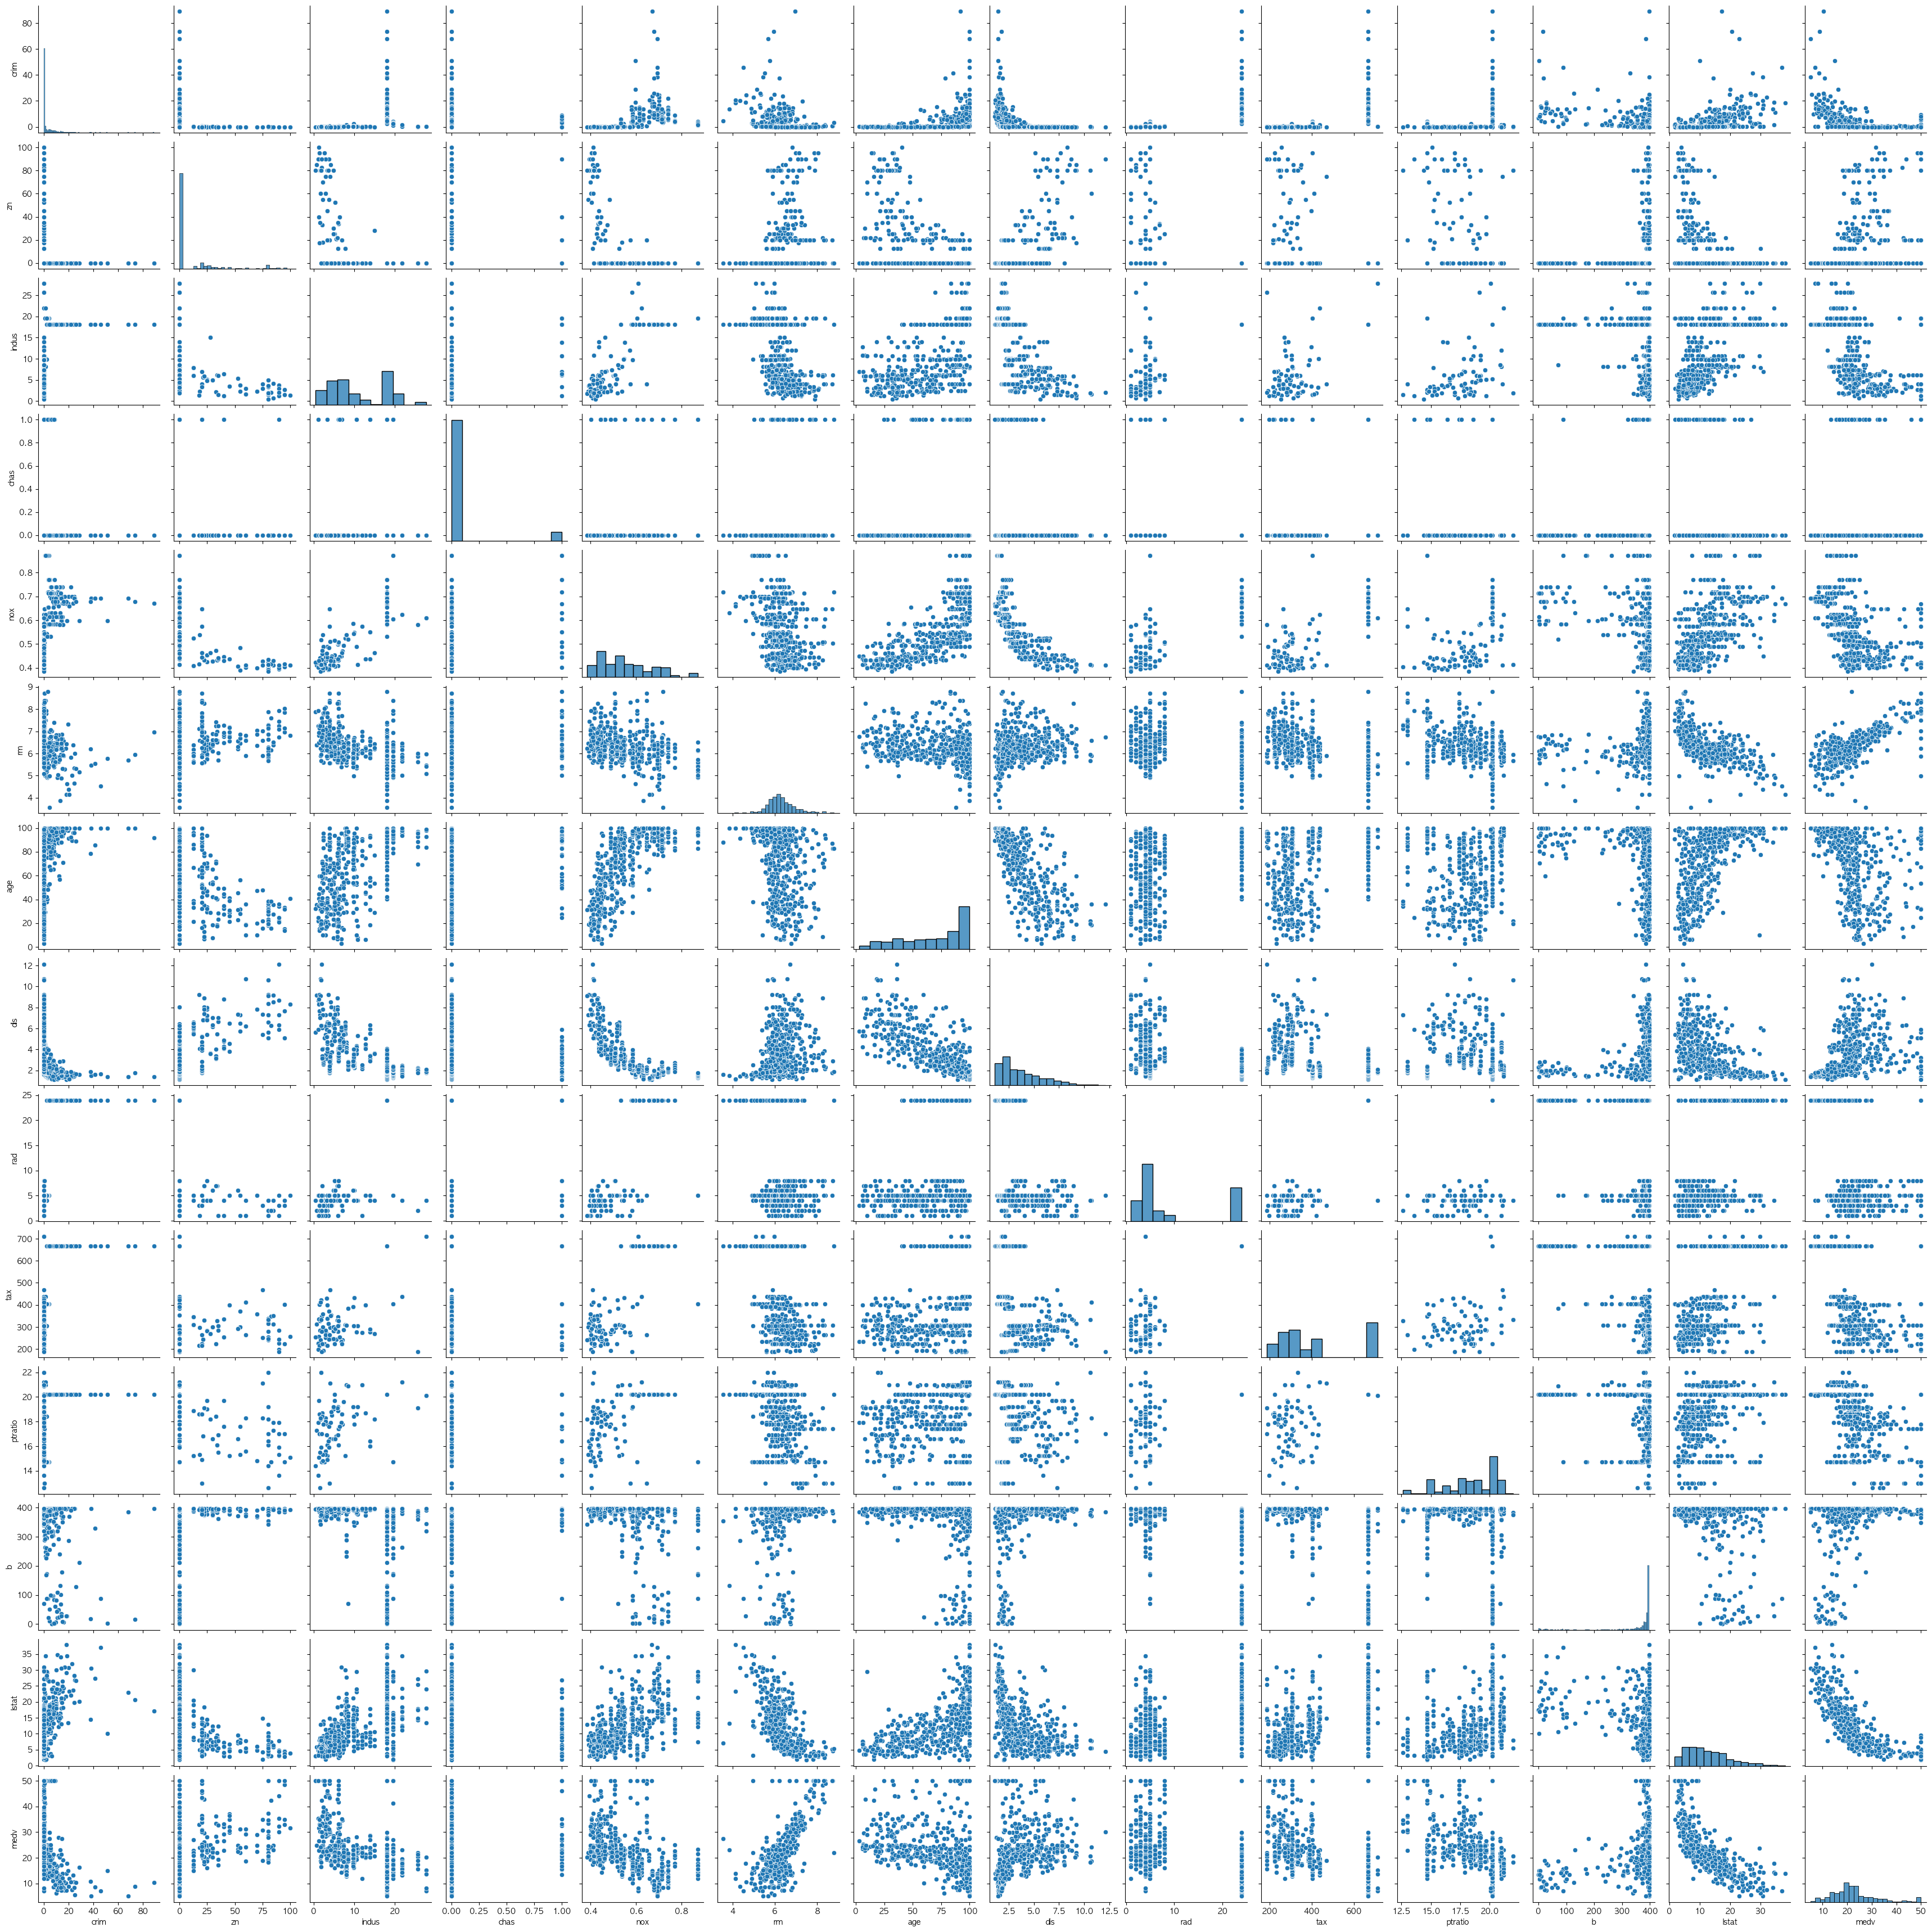

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

# 한글설정
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

# seaborn의 pairplot을 사용하여 컬럼별 관계 시각화
sns.pairplot(df)
plt.show()

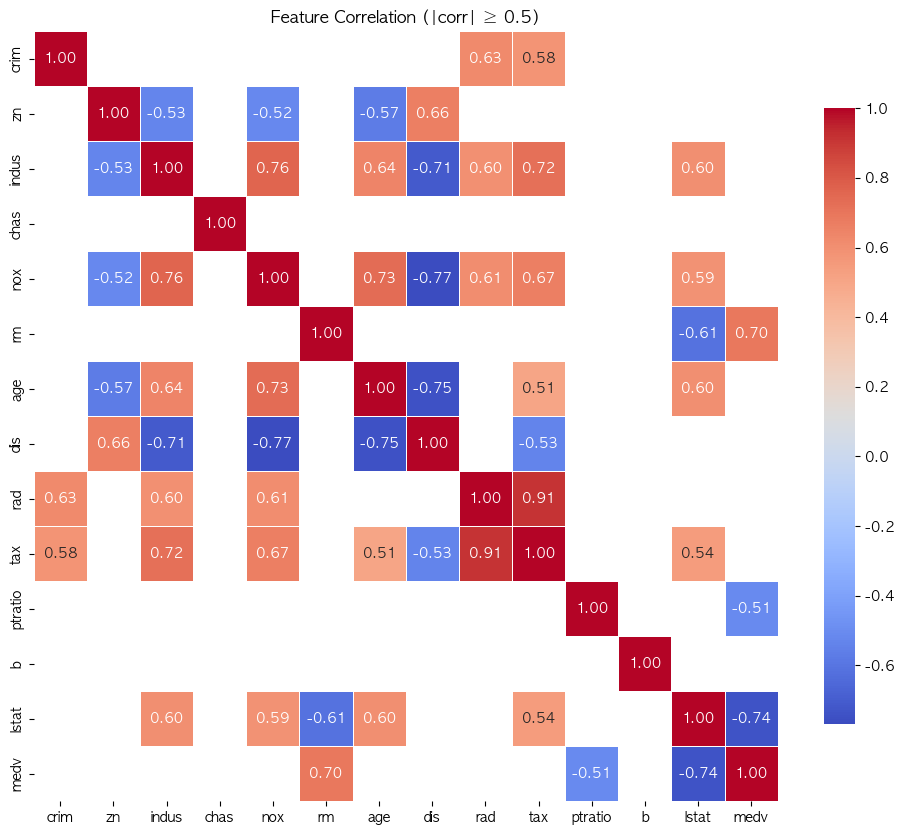

In [7]:

# 상관행렬 계산
corr = df.corr()

# 기준(threshold) 설정
threshold = 0.5

# 마스크 만들기: 절댓값이 threshold보다 작은 곳은 True (가릴 곳)
mask = np.abs(corr) < threshold

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            mask=mask,         
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",          
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})  # colorbar 줄이기
plt.title('Feature Correlation (|corr| ≥ 0.5)')
plt.show()


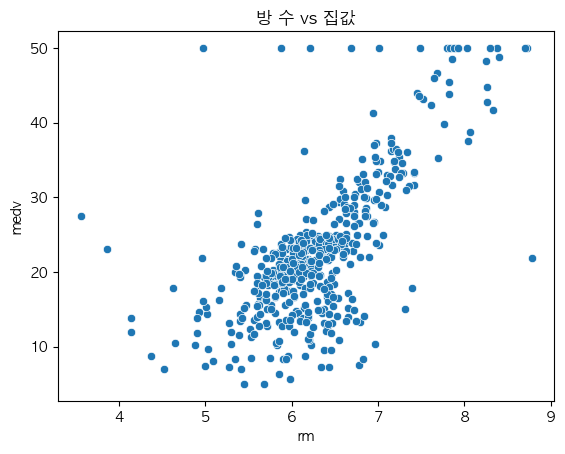

In [8]:
sns.scatterplot(data=df, x='rm', y='medv')
plt.title('방 수 vs 집값')
plt.show()